## Twitter Sentiment Analysis

In [43]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  all


       | 
       | Downloading package abc to /usr/share/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /usr/share/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /usr/share/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /usr/share/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to
       |     /usr/share/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /usr/share/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to
       |     /usr/share/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading pac


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


True

In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [90]:
df = pd.read_csv(r"C:\Users\Sanjay V Kurian\Desktop\AI_Architecture\training.1600000.processed.noemoticon.csv",
                 delimiter=',', encoding='ISO-8859-1')
df.columns = ['Sentiment','id','date','query','user','text']
df.head()

,Sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
df = df[['Sentiment','text']]

In [91]:
df.columns

Index(['Sentiment', 'id', 'date', 'query', 'user', 'text'], dtype='object')

In [92]:
df.Sentiment.value_counts()

Sentiment
0    799996
4    248576
Name: count, dtype: int64

In [93]:
df['Sentiment'] = df['Sentiment'].replace({4:1})

* 0 represent Negative sentiment
* 1 represents Positive sentiment

In [94]:
df.Sentiment.value_counts()

Sentiment
0    799996
1    248576
Name: count, dtype: int64

#### Visualizing the count

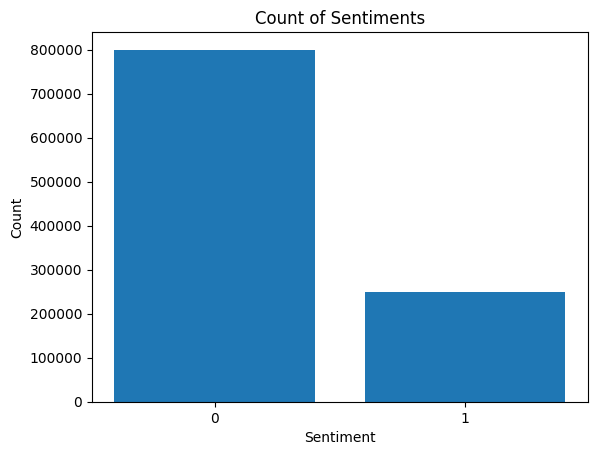

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment_counts = df["Sentiment"].value_counts()
classes = sentiment_counts.index
class_counts = sentiment_counts.values
plt.bar(classes, class_counts)
plt.xticks(classes)

plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Count of Sentiments")
plt.show()


In [96]:
df.isna().sum().sum()

0

**Inference: The data is unbalanced therfore we will downsample the data to have same count for each sentiment**

## Downsampling the dataset

In [97]:
from sklearn.utils import resample

In [98]:
## majority class 0
df_majority = df[df['Sentiment']==0]
## minority class 1
df_minority = df[df['Sentiment']==1]

In [99]:
df_minority.shape

(248576, 6)

In [100]:
# downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,   
                                 n_samples=len(df_minority),    
                                 random_state=1234) 

In [101]:
df = pd.concat([df_majority_downsampled, df_minority])
df.reset_index(drop=True, inplace=True)
df.head()

,Sentiment,id,date,query,user,text
0,0,1694869772,Mon May 04 04:25:52 PDT 2009,NO_QUERY,ainzmcm,Wow slept for almost 12hours. Sleepy me!! Uni ...
1,0,2246023608,Fri Jun 19 16:59:09 PDT 2009,NO_QUERY,mindlessthinker,gets bored with an idea too easily ... like tw...
2,0,1993990202,Mon Jun 01 11:14:27 PDT 2009,NO_QUERY,shaybocks,To my girls - sorry i've been a homebody latel...
3,0,2232834307,Thu Jun 18 20:27:37 PDT 2009,NO_QUERY,angeliqueisrael,BK once again for the weekend...If it wasnt fo...
4,0,2044389260,Fri Jun 05 09:17:11 PDT 2009,NO_QUERY,Salena,@DonnieWahlberg Now why didn't you do that las...


#### Visualizing after downsampling

248576 data for each class

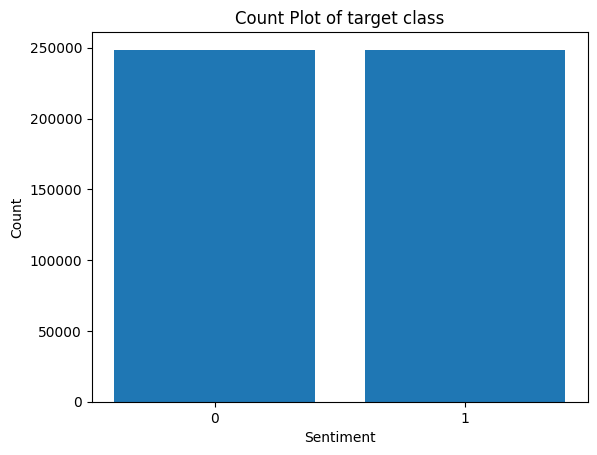

In [102]:
sentiment_counts = df["Sentiment"].value_counts()
classes = sentiment_counts.index
class_counts = sentiment_counts.values
plt.bar(classes, class_counts)
plt.xticks(classes)

plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Count Plot of target class")
plt.show()

## Data Preprocessing

1. removing stop words
2. removing punctuations
3. Lemmatizing
4. removing tags
5. removing special characters 
6. lowercase conversion

In [103]:
## remove stopwords and punctuation marks
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()

corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

497152
Wow slept for almost 12hours. Sleepy me!! Uni now, boo! I wanna stay home, drink tea and watch house... 


In [104]:
%%time
final_corpus = []
final_corpus_joined = []
for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text 
            if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

CPU times: total: 1min 7s
Wall time: 1min 8s


#### Storing the cleaned data seperately

In [105]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["Sentiment"] = df["Sentiment"].values

In [106]:
data_cleaned['Sentiment'].value_counts()

Sentiment
0    248576
1    248576
Name: count, dtype: int64

In [107]:
data_cleaned.head()

,text,Sentiment
0,wow slept almost hour sleepy uni boo wanna sta...,0
1,get bored idea easily like twitter,0
2,girl sorry homebody lately dont feel well does...,0
3,bk weekend wasnt puppy stay as,0
4,donniewahlberg last night atlanta,0


In [108]:
df

,Sentiment,id,date,query,user,text
0,0,1694869772,Mon May 04 04:25:52 PDT 2009,NO_QUERY,ainzmcm,Wow slept for almost 12hours. Sleepy me!! Uni ...
1,0,2246023608,Fri Jun 19 16:59:09 PDT 2009,NO_QUERY,mindlessthinker,gets bored with an idea too easily ... like tw...
2,0,1993990202,Mon Jun 01 11:14:27 PDT 2009,NO_QUERY,shaybocks,To my girls - sorry i've been a homebody latel...
3,0,2232834307,Thu Jun 18 20:27:37 PDT 2009,NO_QUERY,angeliqueisrael,BK once again for the weekend...If it wasnt fo...
4,0,2044389260,Fri Jun 05 09:17:11 PDT 2009,NO_QUERY,Salena,@DonnieWahlberg Now why didn't you do that las...
...,...,...,...,...,...,...
497147,1,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
497148,1,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
497149,1,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
497150,1,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [109]:
df['text'] = final_corpus_joined

In [110]:
df

,Sentiment,id,date,query,user,text
0,0,1694869772,Mon May 04 04:25:52 PDT 2009,NO_QUERY,ainzmcm,wow slept almost hour sleepy uni boo wanna sta...
1,0,2246023608,Fri Jun 19 16:59:09 PDT 2009,NO_QUERY,mindlessthinker,get bored idea easily like twitter
2,0,1993990202,Mon Jun 01 11:14:27 PDT 2009,NO_QUERY,shaybocks,girl sorry homebody lately dont feel well does...
3,0,2232834307,Thu Jun 18 20:27:37 PDT 2009,NO_QUERY,angeliqueisrael,bk weekend wasnt puppy stay as
4,0,2044389260,Fri Jun 05 09:17:11 PDT 2009,NO_QUERY,Salena,donniewahlberg last night atlanta
...,...,...,...,...,...,...
497147,1,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,grandma making dinenr mum
497148,1,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,mid morning snack time bowl cheese noodle yum
497149,1,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,shadela say like terminiator movie come like word
497150,1,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,destinyhope im great thaanks wbuu


In [111]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with the 'date' column

# Split the 'date' column into separate components
date_components = df['date'].str.split()

# Extract the day of the week, date, and time components
df['day_of_week'] = date_components.str[0]
df['date'] = date_components.str[1] + " " + date_components.str[2] + " " + date_components.str[5]
df['time'] = date_components.str[3]

# Convert the 'date' column to datetime datatype
df['date'] = pd.to_datetime(df['date'], format='%b %d %Y')

# Display the updated DataFrame
df.head()

,Sentiment,id,date,query,user,text,day_of_week,time
0,0,1694869772,2009-05-04,NO_QUERY,ainzmcm,wow slept almost hour sleepy uni boo wanna sta...,Mon,04:25:52
1,0,2246023608,2009-06-19,NO_QUERY,mindlessthinker,get bored idea easily like twitter,Fri,16:59:09
2,0,1993990202,2009-06-01,NO_QUERY,shaybocks,girl sorry homebody lately dont feel well does...,Mon,11:14:27
3,0,2232834307,2009-06-18,NO_QUERY,angeliqueisrael,bk weekend wasnt puppy stay as,Thu,20:27:37
4,0,2044389260,2009-06-05,NO_QUERY,Salena,donniewahlberg last night atlanta,Fri,09:17:11


In [112]:
df.to_csv(r"C:\Users\Sanjay V Kurian\Downloads\Sentiment_Analysis_full.csv",index = False)

## EDA

In [67]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['Sentiment'] = df["Sentiment"].values
data_eda.head()

,text,Sentiment
0,"[wow, slept, almost, hour, sleepy, uni, boo, w...",0
1,"[get, bored, idea, easily, like, twitter]",0
2,"[girl, sorry, homebody, lately, dont, feel, we...",0
3,"[bk, weekend, wasnt, puppy, stay, as]",0
4,"[donniewahlberg, last, night, atlanta]",0


In [68]:
# Storing positive data seperately
positive = data_eda[data_eda['Sentiment'] == 1]
positive_list = positive['text'].tolist()

# Storing negative data seperately

negative = data_eda[data_eda['Sentiment'] == 0]
negative_list = negative['text'].tolist()

In [69]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

In [71]:
data_eda.to_csv(r"C:\Users\Sanjay V Kurian\Downloads\Sentiment_Analysis.csv",index = False)

#### Word Cloud Positive data

In [74]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


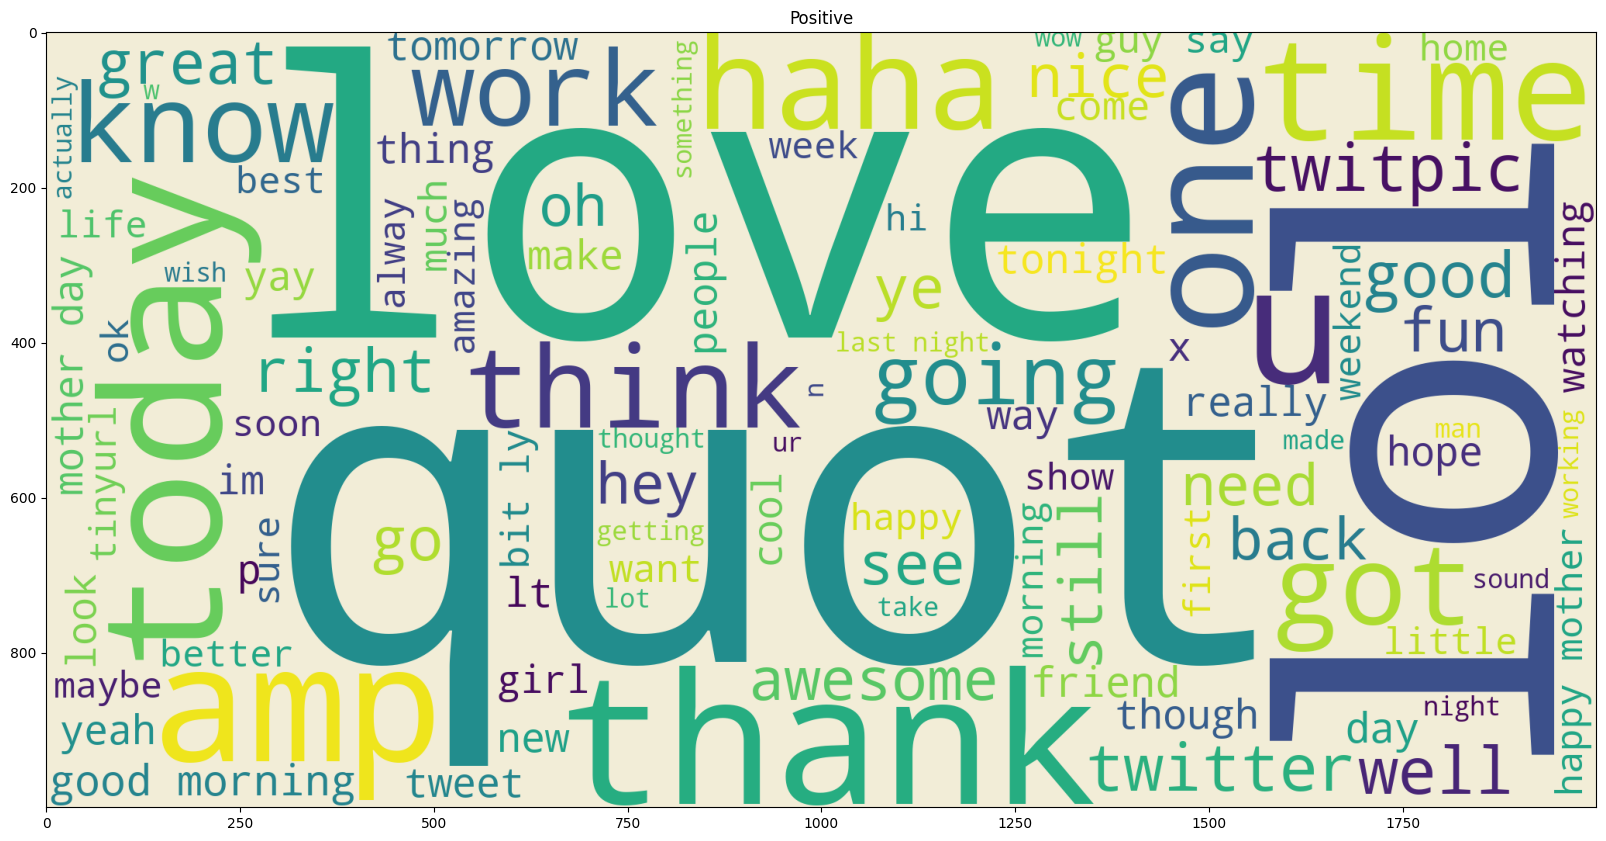

In [75]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

#### Word CLoud Negative data

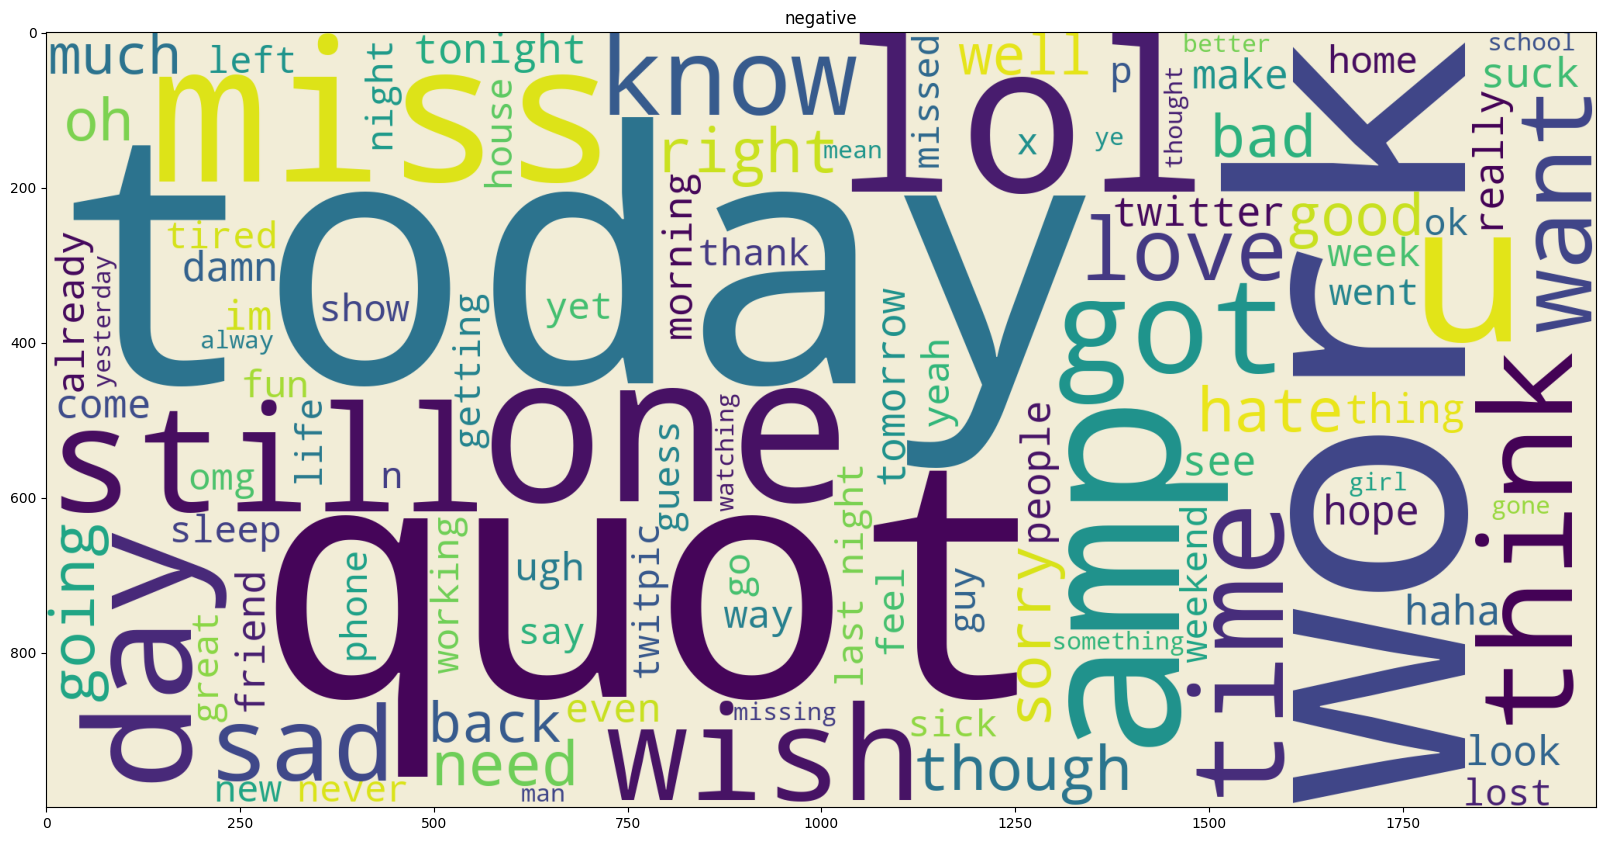

In [76]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

**Inference:**
* Positive data has words like Thank, love , LOL, Haha ets 
* Negative data has words like work, sad, tired, suck sorry <br>
Some of the words are still common in both such as Lol, quot

#### One word count

In [77]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    return(dic)
count_corpus = get_count(positive_list)

In [78]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

In [79]:
count_corpus

,word,count
484,good,20273
84,day,19789
0,love,14982
180,http,14800
195,quot,14567
...,...,...
80783,gaza,1
80781,kimbeaver,1
80780,yegbikervr,1
80779,yegbiker,1


In [80]:
count_corpus.to_csv(r"C:\Users\Sanjay V Kurian\Downloads\Sentiment_Analysis_Count_corpus_positive.csv",index = False)

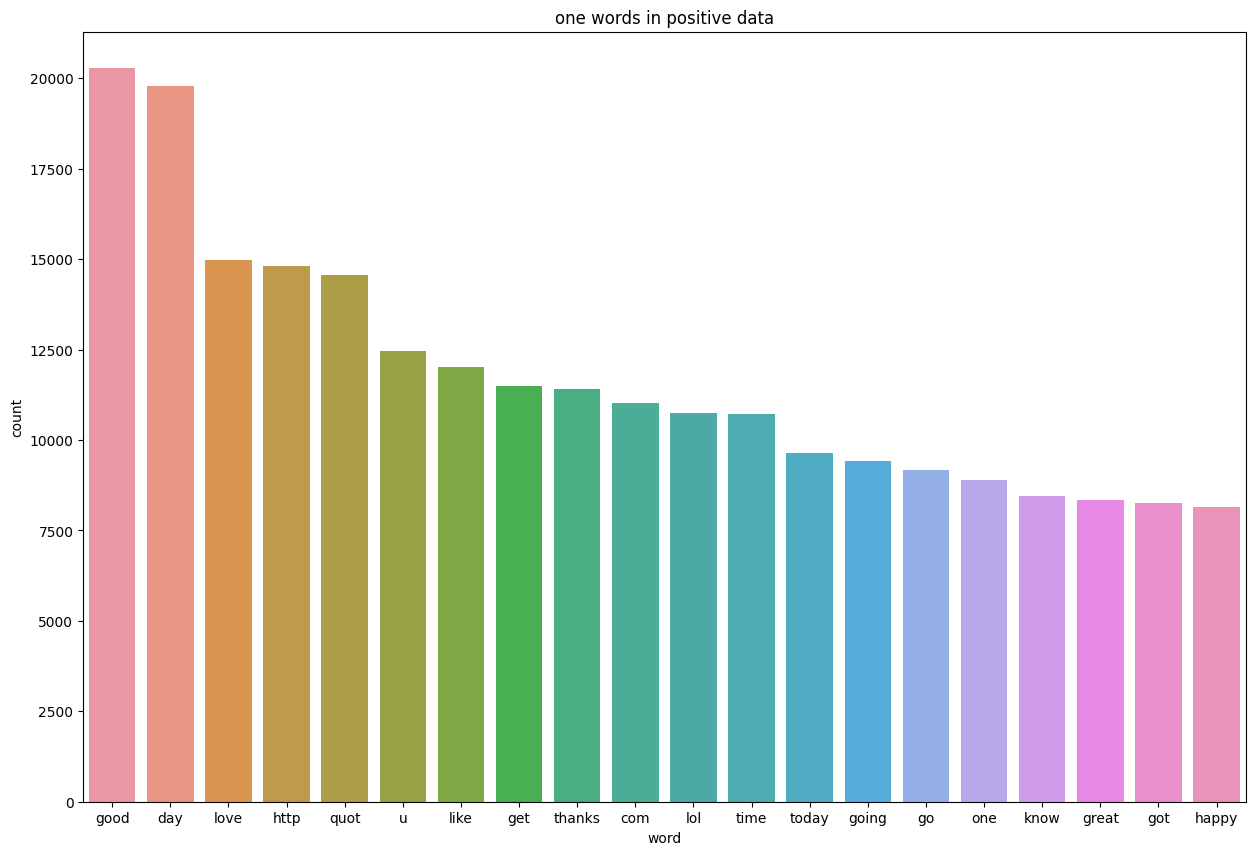

In [81]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in positive data')
plt.show()

In [82]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    #dic = dict(sorted(dic.items() , key = lambda x:x[1],reverse=True))
    return(dic)
count_corpus = get_count(negative_list)

In [83]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

In [85]:
count_corpus.to_csv(r"C:\Users\Sanjay V Kurian\Downloads\Sentiment_Analysis_Count_corpus_negative.csv",index = False)

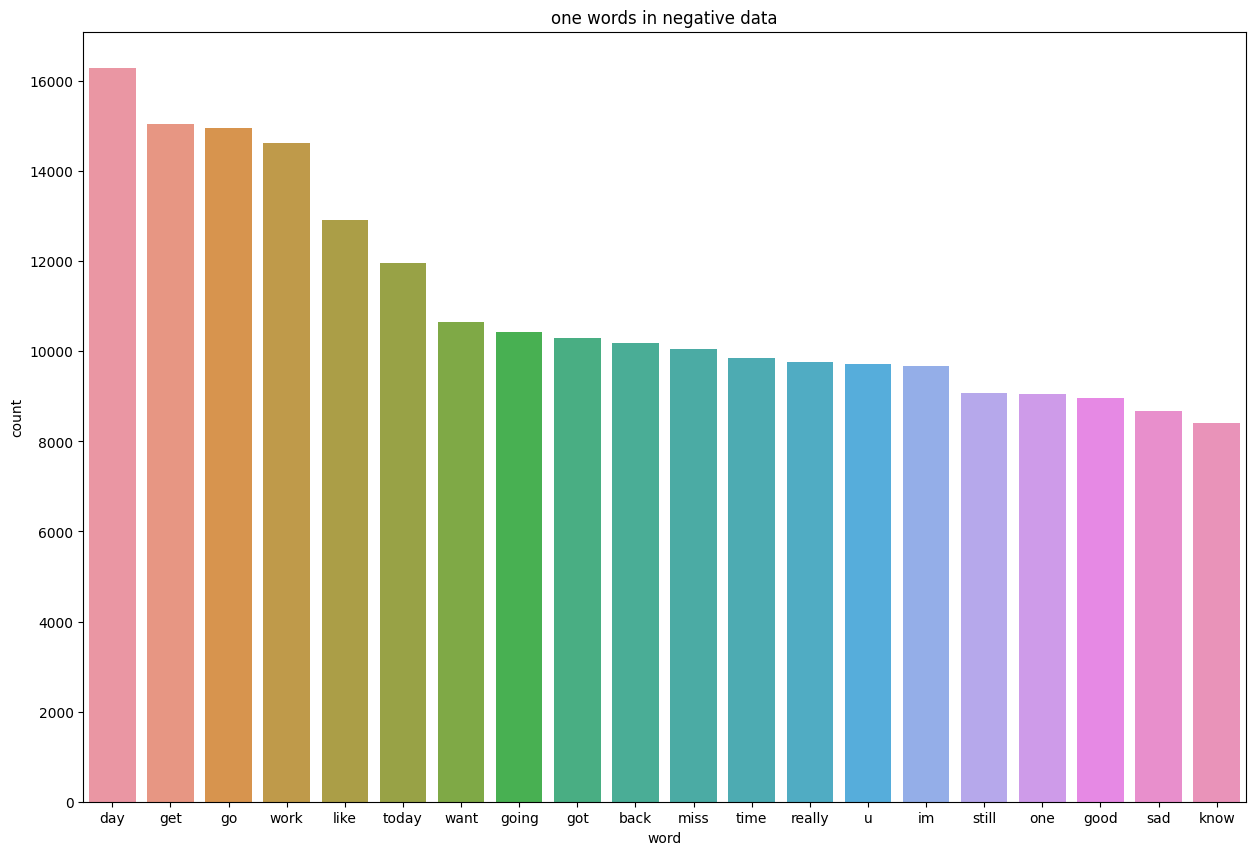

In [84]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in negative data')
plt.show()

**Inference**
* Positive data has words like good, day, thanks, great, happy
* Negative data has words like work, miss, sad etc

## Classification 
### Naive bayes for sentiment analysis

In [74]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_list)
negative_tokens_for_model = get_tweets_for_model(negative_list)

In [75]:
import random

positive_dataset = [(review_dict, "Positive")
                     for review_dict in positive_tokens_for_model]

negative_dataset = [(review_dict, "Negative")
                     for review_dict in negative_tokens_for_model]
dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:333091]
test_data = dataset[333091:]


In [76]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print(" Training Accuracy is:", round(classify.accuracy(classifier, train_data),2)*100)

print("Testing Accuracy is:", round(classify.accuracy(classifier, test_data),2)*100)

print(classifier.show_most_informative_features(10))

 Training Accuracy is: 86.0
Testing Accuracy is: 76.0
Most Informative Features
                 fawcett = True           Negati : Positi =     51.1 : 1.0
                  farrah = True           Negati : Positi =     42.7 : 1.0
             squarespace = True           Negati : Positi =     41.4 : 1.0
                 saddest = True           Negati : Positi =     36.4 : 1.0
                    iran = True           Negati : Positi =     35.1 : 1.0
                sprained = True           Negati : Positi =     33.1 : 1.0
            mussomitchel = True           Positi : Negati =     31.6 : 1.0
                  booooo = True           Negati : Positi =     31.1 : 1.0
                 jackman = True           Positi : Negati =     29.6 : 1.0
                hayfever = True           Negati : Positi =     29.1 : 1.0
None


### TFIDF for sentiment analysis

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data_cleaned['text'])
y = data_cleaned['Sentiment']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify = y)

In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [80]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
  print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
  print(classification_report(y_train,y_train_pred))
  plt.show()

  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

### Multinomial NB

training accuracy =  85.0
              precision    recall  f1-score   support

           0       0.83      0.88      0.85    166545
           1       0.87      0.82      0.85    166546

    accuracy                           0.85    333091
   macro avg       0.85      0.85      0.85    333091
weighted avg       0.85      0.85      0.85    333091



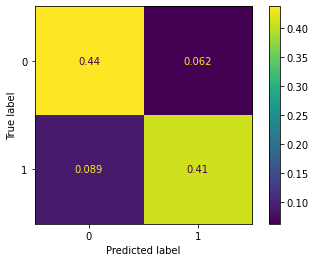

testing accuracy =  76.0
              precision    recall  f1-score   support

           0       0.75      0.80      0.77     82031
           1       0.78      0.73      0.75     82030

    accuracy                           0.76    164061
   macro avg       0.76      0.76      0.76    164061
weighted avg       0.76      0.76      0.76    164061



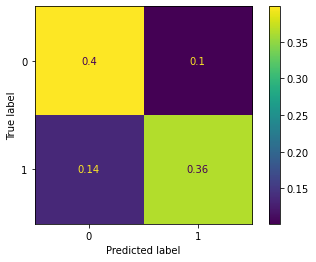

In [81]:
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

### Linear SVC

training accuracy =  90.0
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    166545
           1       0.90      0.90      0.90    166546

    accuracy                           0.90    333091
   macro avg       0.90      0.90      0.90    333091
weighted avg       0.90      0.90      0.90    333091



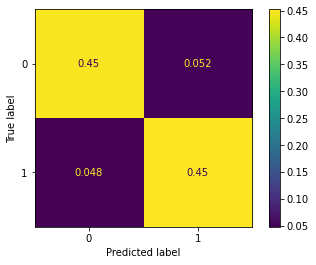

testing accuracy =  77.0
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     82031
           1       0.76      0.78      0.77     82030

    accuracy                           0.77    164061
   macro avg       0.77      0.77      0.77    164061
weighted avg       0.77      0.77      0.77    164061



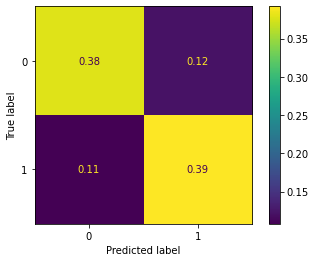

In [82]:
svc = LinearSVC()
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)


### Logistic regression

training accuracy =  83.0
              precision    recall  f1-score   support

           0       0.84      0.81      0.82    166545
           1       0.82      0.84      0.83    166546

    accuracy                           0.83    333091
   macro avg       0.83      0.83      0.83    333091
weighted avg       0.83      0.83      0.83    333091



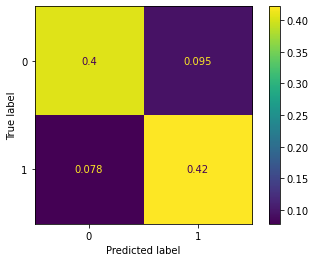

testing accuracy =  78.0
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     82031
           1       0.76      0.80      0.78     82030

    accuracy                           0.78    164061
   macro avg       0.78      0.78      0.78    164061
weighted avg       0.78      0.78      0.78    164061



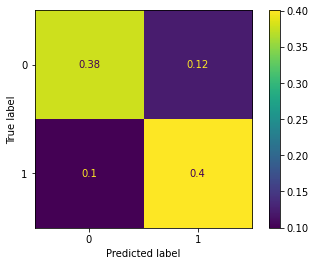

In [83]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

## Conclusion

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Naive Bayes|86%|76%|
|Multinomial NB| 85%|76%|
|linear SVC|90%|77%|
|Logistic|83%|78%|




We see that Logistic regression model performs best with least overfitting as compared to other models and has better performance in testing dataset as well